# 'grocery.csv'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from apriori import Apriori
from arules import Arules


In [32]:
table = pd.read_csv('grocery.csv', header=None) # pas de colonnes
table.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
print("colonnes:\n", table.columns)
print("describe:\n", table.describe())
table.fillna('', inplace=True)

colonnes:
 Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19],
           dtype='int64')
describe:
                    0              1              2              3          4   \
count            7501           5747           4389           3345       2529   
unique            115            117            115            114        110   
top     mineral water  mineral water  mineral water  mineral water  green tea   
freq              577            484            375            201        153   

                  5          6          7          8          9   \
count           1864       1369        981        654        395   
unique           106        102         98         88         80   
top     french fries  green tea  green tea  green tea  green tea   
freq             107         96         67         57         31   

                    10         11         12         13         14      15  \
count              256        15

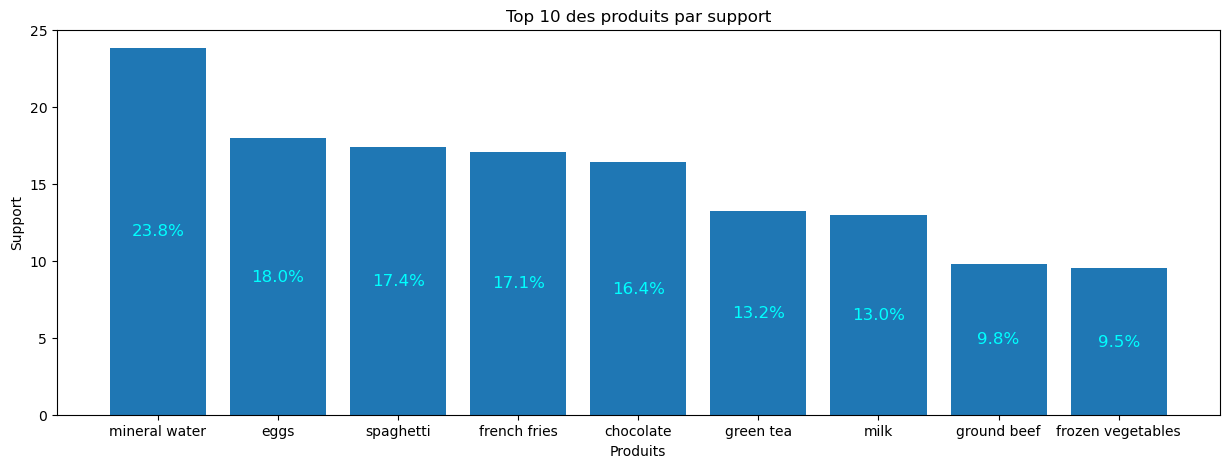

In [35]:
counts = table.stack().value_counts()

plt.figure(figsize = (15,5))
bars = plt.bar(x = np.arange(1,10), height = counts.values[1:10]/len(table.values)*100)
plt.bar_label(bars, fontsize=12, color='cyan', fmt = '%2.1f%%', label_type = 'center')
plt.xticks(ticks = np.arange(1,10), labels = counts.index[1:10])

plt.title('Top 10 des produits par support')
plt.ylabel('Support')
plt.xlabel('Produits')
plt.show()


In [36]:
items = sorted(list(set([x.strip() for x in table.values.flatten() if x!=''])))
index = {v:i+1 for i,v in enumerate(items)}
print("number of items", len(items))
transactions = {i:[index[x.strip()] for x in table.values[i] if x!='']for i in range(len(table))}
print("number of transactions", len(transactions))


number of items 119
number of transactions 7501


In [37]:
algo = Apriori(transactions)
index_int_to_str = {v:k for k,v in index.items()}
produits_frequents = [[tuple(index_int_to_str[idx] for idx in tup) for tup in lst] for lst in algo.main(.02)]
produits_frequents


{1: 'almonds',
 2: 'antioxydant juice',
 3: 'asparagus',
 4: 'avocado',
 5: 'babies food',
 6: 'bacon',
 7: 'barbecue sauce',
 8: 'black tea',
 9: 'blueberries',
 10: 'body spray',
 11: 'bramble',
 12: 'brownies',
 13: 'bug spray',
 14: 'burger sauce',
 15: 'burgers',
 16: 'butter',
 17: 'cake',
 18: 'candy bars',
 19: 'carrots',
 20: 'cauliflower',
 21: 'cereals',
 22: 'champagne',
 23: 'chicken',
 24: 'chili',
 25: 'chocolate',
 26: 'chocolate bread',
 27: 'chutney',
 28: 'cider',
 29: 'clothes accessories',
 30: 'cookies',
 31: 'cooking oil',
 32: 'corn',
 33: 'cottage cheese',
 34: 'cream',
 35: 'dessert wine',
 36: 'eggplant',
 37: 'eggs',
 38: 'energy bar',
 39: 'energy drink',
 40: 'escalope',
 41: 'extra dark chocolate',
 42: 'flax seed',
 43: 'french fries',
 44: 'french wine',
 45: 'fresh bread',
 46: 'fresh tuna',
 47: 'fromage blanc',
 48: 'frozen smoothie',
 49: 'frozen vegetables',
 50: 'gluten free bar',
 51: 'grated cheese',
 52: 'green beans',
 53: 'green grapes',
 54:

In [ ]:
rules = Arules(algo.main(.003), algo.support_history)
df_rules = rules.main(.2)
print(df_rules.describe())

In [ ]:
df_rules["Rules"] = [f"{index_int_to_str[df_rules.lhs[i][0]]} -> {index_int_to_str[df_rules.rhs[i][0]]}" for i in range(len(df_rules))]
for i in df_rules[df_rules.lift>4].index:
    print("Rule : ", df_rules["Rules"][i])
    print("Support : ", str(df_rules["support"][i]))
    print("Confidence : ",str(df_rules["confidence"][i]))
    print("Lift : ", str(df_rules["lift"][i]))
    print("--------------------------------") 
df_rules

In [ ]:
a=df_rules[df_rules.lift>2]
a = a.reset_index(drop=True)
plt.figure(figsize = (20,20))
support = a['support']
confidence = a['confidence']
rule = a['Rules']
ax = sns.scatterplot(data = a, x = 'support', y = 'confidence', hue = 'lift', size = 'lift', sizes = (50,500))
for i,j in enumerate(rule):
    plt.annotate(j, (support[i] + 0.003, confidence[i] ))

plt.title('Nuage de points des règles en fonction de support, de confiance et de lift', fontsize = 20)

# 'BreadBasket_DMS.csv'

In [ ]:
table = pd.read_csv('BreadBasket_DMS.csv').drop(['Date','Time'],axis=1)
print('describe:\n', table.describe(include='all'))
table.head()

In [ ]:
dico = table.Item.value_counts().to_dict()

plt.figure(figsize = (15,5))
bars = plt.bar(x = np.arange(1,10), height = np.array(list(dico.values())[1:10])/len(table.values)*100)
plt.bar_label(bars, fontsize=12, color='cyan', fmt = '%2.1f%%', label_type = 'center')
plt.xticks(ticks = np.arange(1,10), labels = list(dico.keys())[1:10])

plt.title('Top 10 des produits par support')
plt.ylabel('Support')
plt.xlabel('Produits')
plt.show()

In [ ]:
items = [x.strip() for x in sorted(dico) if x !='NONE']
index = {v:i+1 for i,v in enumerate(items)}
ma_table = table.drop(table[table.Item=='NONE'].index)
print("describe:\n", ma_table.describe(include='all'))



In [ ]:
transactions = {}
for i,v in zip(ma_table.Transaction.values, ma_table.Item.values):
    _old = transactions.get(i,[])
    _old.append(index[v.strip()])
    transactions[i] = _old
print("nb items", len(items))
print("nb transactions", len(transactions))
transactions

In [ ]:
algo = Apriori(transactions)
index_int_to_str = {v:k for k,v in index.items()}
produits_frequents = [[tuple(index_int_to_str[idx] for idx in tup) for tup in lst] for lst in algo.main(.01)]
produits_frequents


In [ ]:
rules = Arules(algo.main(.003), algo.support_history)
df_rules = rules.main(.1)
print(df_rules.describe())

In [ ]:

df_rules["Rules"] = [f"{index_int_to_str[df_rules.lhs[i][0]]} -> {index_int_to_str[df_rules.rhs[i][0]]}" for i in range(len(df_rules))]
for i in df_rules[df_rules.confidence>0.5].index:
    print("Rule : ", df_rules["Rules"][i])
    print("Support : ", str(df_rules["support"][i]))
    print("Confidence : ",str(df_rules["confidence"][i]))
    print("Lift : ", str(df_rules["lift"][i]))
    print("--------------------------------") 


In [ ]:
df_rules.sort_values('confidence', ascending = False, inplace = True)
b=df_rules[df_rules.confidence>0.55]
b.reset_index(drop=True)

In [ ]:
a=df_rules[df_rules.confidence>0.5]
a = a.reset_index(drop=True)
plt.figure(figsize = (20,20))
support = a['support']
confidence = a['confidence']
rule = a['Rules']
ax = sns.scatterplot(data = a, x = 'support', y = 'confidence', hue = 'lift', size = 'lift', sizes = (50,500))
for i,j in enumerate(rule):
    plt.annotate(j, (support[i] + 0.003, confidence[i] ))

plt.title('Nuage de points des règles en fonction de support, de confiance et de lift', fontsize = 20)

# 'Online_Retail.csv'

In [ ]:
table = pd.read_csv("Online_Retail.csv").drop("StockCode Quantity InvoiceDate UnitPrice CustomerID".split(), axis=1)
table.describe()

In [ ]:
table = pd.read_csv("Online_Retail.csv").drop("Quantity InvoiceDate UnitPrice CustomerID".split(), axis=1)

not_canceled = table[~ table.InvoiceNo.str.startswith('C')]
not_canceled[not_canceled.Description.isna()].describe()

In [ ]:
pays_retail = not_canceled.groupby(['Country']).agg(InvoiceCount = ('InvoiceNo', 'count')).reset_index()
pays_retail.sort_values('InvoiceCount', ascending=False, inplace=True, ignore_index=True)
top10=pays_retail.head(20)
top10

In [ ]:
plt.figure(figsize=[12,6])
plt.bar(top10["Country"],top10["InvoiceCount"])
plt.title("Répartition des transactions par pays")
plt.show()

In [ ]:
not_canceled['Description'] = not_canceled['Description'].str.strip()
not_canceled['InvoiceNo'] = not_canceled['InvoiceNo'].astype('str')
fr_retail = not_canceled[not_canceled["Country"]=="France"]
fr_retail.head()

In [ ]:
dico = fr_retail['Description'].value_counts().to_dict()
plt.figure(figsize = (40,15))
bars = plt.bar(x = np.arange(10), height = np.array(list(dico.values())[:10])/len(fr_retail.values)*100)
plt.bar_label(bars, fontsize=12, color='cyan', fmt = '%2.1f%%', label_type = 'center')
plt.xticks(ticks = np.arange(10), labels = list(dico.keys())[:10])

plt.title('Top 10 des produits par support')
plt.ylabel('Support')
plt.xlabel('Produits')
plt.show()
dico

In [ ]:
items = [x.strip() for x in sorted(dico)]
index = {v:i+1 for i,v in enumerate(items)}


In [ ]:
invoice = {invoi: i+1 for i,invoi  in enumerate(fr_retail['InvoiceNo'].unique())}
fr_retail['tid'] = fr_retail['InvoiceNo'].map(invoice)
fr_retail

In [ ]:
transactions = {}
for i,v in zip(fr_retail['tid'].values,fr_retail['Description'].values):
    if isinstance(v, str):
        _old = transactions.get(i,[])
        _old.append(index[v.strip()])
        transactions[i] = _old
print("nb items", len(items))
print("nb transactions", len(transactions))
transactions

In [ ]:
algo = Apriori(transactions)
index_int_to_str = {v:k for k,v in index.items()}
produits_frequents = [[tuple(index_int_to_str[idx] for idx in tup) for tup in lst] for lst in algo.main(.09)]
produits_frequents



In [ ]:
rules = Arules(algo.main(.1), algo.support_history)
df_rules = rules.main(.2)
print(df_rules.describe())

In [ ]:
index_int_to_str = {v:k for k,v in index.items()}
df_rules["Rules"] = [f"{index_int_to_str[df_rules.lhs[i][0]]} -> {index_int_to_str[df_rules.rhs[i][0]]}" for i in range(len(df_rules))]
for i in df_rules[df_rules.lift>4].index:
    print("Rule : ", df_rules["Rules"][i])
    print("Support : ", str(df_rules["support"][i]))
    print("Confidence : ",str(df_rules["confidence"][i]))
    print("Lift : ", str(df_rules["lift"][i]))
    print("--------------------------------") 


In [ ]:
df_rules

In [8]:
df = pd.read_csv('sample_3.csv')
df.describe()
df.values
df.values[:,1:]
df.values[:,1:] * np.array([1,2,3,4,5])
a=[[x for x in l if x>0] for l in df.values[:,1:] * np.array([1,2,3,4,5])]
b={a:i for a, i in enumerate(a)}
b

array([[1, 2, 0, 0, 5],
       [0, 2, 0, 4, 0],
       [0, 2, 0, 4, 0],
       [1, 2, 0, 4, 0],
       [1, 0, 3, 0, 0],
       [0, 2, 3, 0, 0],
       [1, 0, 3, 0, 0],
       [1, 2, 3, 0, 5],
       [1, 2, 3, 0, 0]], dtype=object)

# 'mushrooms.csv'

In [38]:
table = pd.read_csv("mushrooms.csv")
table['class'].replace(['e','p'],['Edible','Poisonous'],inplace=True)
table.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,Poisonous,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,Edible,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,Edible,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,Poisonous,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,Edible,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [39]:
df = pd.get_dummies(table,prefix_sep="_")
df.head()


,class_Edible,class_Poisonous,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [40]:
items=[[x for x in l if x>0] for l in df.values[:,:] * np.arange(1,120)]
transactions={tid:item for tid, item in enumerate(items)}
transactions

{0: [2,
  8,
  11,
  17,
  24,
  31,
  35,
  36,
  39,
  44,
  52,
  57,
  61,
  65,
  74,
  83,
  85,
  88,
  91,
  97,
  100,
  110,
  118],
 1: [1,
  8,
  11,
  22,
  24,
  25,
  35,
  36,
  38,
  44,
  52,
  56,
  61,
  65,
  74,
  83,
  85,
  88,
  91,
  97,
  101,
  109,
  114],
 2: [1,
  3,
  11,
  21,
  24,
  28,
  35,
  36,
  38,
  45,
  52,
  56,
  61,
  65,
  74,
  83,
  85,
  88,
  91,
  97,
  101,
  109,
  116],
 3: [2,
  8,
  12,
  21,
  24,
  31,
  35,
  36,
  39,
  45,
  52,
  57,
  61,
  65,
  74,
  83,
  85,
  88,
  91,
  97,
  100,
  110,
  118],
 4: [1,
  8,
  11,
  16,
  23,
  30,
  35,
  37,
  38,
  44,
  53,
  57,
  61,
  65,
  74,
  83,
  85,
  88,
  91,
  93,
  101,
  107,
  114],
 5: [1,
  8,
  12,
  22,
  24,
  25,
  35,
  36,
  38,
  45,
  52,
  56,
  61,
  65,
  74,
  83,
  85,
  88,
  91,
  97,
  100,
  109,
  114],
 6: [1,
  3,
  11,
  21,
  24,
  25,
  35,
  36,
  38,
  42,
  52,
  56,
  61,
  65,
  74,
  83,
  85,
  88,
  91,
  97,
  100,
  109,
  116],

In [42]:
algo = Apriori(transactions)

index_int_to_str = {v:k for k,v in index.items()}
produits_frequents = [[tuple(df.columns[idx] for idx in tup) for tup in lst] for lst in algo.main(.8)]
produits_frequents


[[('gill-spacing_c',),
  ('gill-spacing_w',),
  ('veil-color_n',),
  ('veil-color_y',),
  ('ring-number_t',)],
 [('gill-spacing_c', 'gill-spacing_w'),
  ('gill-spacing_c', 'veil-color_n'),
  ('gill-spacing_c', 'veil-color_y'),
  ('gill-spacing_c', 'ring-number_t'),
  ('gill-spacing_w', 'veil-color_n'),
  ('gill-spacing_w', 'veil-color_y'),
  ('veil-color_n', 'veil-color_y'),
  ('veil-color_n', 'ring-number_t'),
  ('veil-color_y', 'ring-number_t')],
 [('gill-spacing_c', 'gill-spacing_w', 'veil-color_n'),
  ('gill-spacing_c', 'gill-spacing_w', 'veil-color_y'),
  ('gill-spacing_c', 'veil-color_n', 'veil-color_y'),
  ('gill-spacing_c', 'veil-color_n', 'ring-number_t'),
  ('gill-spacing_c', 'veil-color_y', 'ring-number_t'),
  ('gill-spacing_w', 'veil-color_n', 'veil-color_y'),
  ('veil-color_n', 'veil-color_y', 'ring-number_t')],
 [('gill-spacing_c', 'gill-spacing_w', 'veil-color_n', 'veil-color_y'),
  ('gill-spacing_c', 'veil-color_n', 'veil-color_y', 'ring-number_t')]]

In [43]:
rules = Arules(algo.main(.8), algo.support_history)
df_rules = rules.main(.8)
df_rules

,lhs,rhs,lhs_support,rhs_support,support,confidence,lift,leverage,conviction
0,"(36,)","(35,)",0.838503,0.974151,0.812654,0.969172,0.994889,-0.004175,0.838503
1,"(35,)","(36,)",0.974151,0.838503,0.812654,0.834218,0.994889,-0.004175,0.974151
2,"(85,)","(35,)",1.000000,0.974151,0.974151,0.974151,1.000000,0.000000,1.000000
3,"(35,)","(85,)",0.974151,1.000000,0.974151,1.000000,1.000000,0.000000,inf
4,"(88,)","(35,)",0.975382,0.974151,0.973166,0.997728,1.024203,0.022997,11.379452
5,"(35,)","(88,)",0.974151,0.975382,0.973166,0.998989,1.024203,0.022997,24.353767
6,"(91,)","(35,)",0.921713,0.974151,0.898080,0.974359,1.000214,0.000192,1.008124
7,"(35,)","(91,)",0.974151,0.921713,0.898080,0.921911,1.000214,0.000192,1.002524
8,"(85,)","(36,)",1.000000,0.838503,0.838503,0.838503,1.000000,0.000000,1.000000
9,"(36,)","(85,)",0.838503,1.000000,0.838503,1.000000,1.000000,0.000000,inf


In [44]:
df_rules["Rules"] = [f"{df.columns[df_rules.lhs[i][0]]} -> {df.columns[df_rules.rhs[i][0]]}" for i in range(len(df_rules))]
df_rules[df_rules.confidence>0.9]

,lhs,rhs,lhs_support,rhs_support,support,confidence,lift,leverage,conviction,Rules
0,"(36,)","(35,)",0.838503,0.974151,0.812654,0.969172,0.994889,-0.004175,0.838503,gill-spacing_w -> gill-spacing_c
2,"(85,)","(35,)",1.000000,0.974151,0.974151,0.974151,1.000000,0.000000,1.000000,veil-color_n -> gill-spacing_c
3,"(35,)","(85,)",0.974151,1.000000,0.974151,1.000000,1.000000,0.000000,inf,gill-spacing_c -> veil-color_n
4,"(88,)","(35,)",0.975382,0.974151,0.973166,0.997728,1.024203,0.022997,11.379452,veil-color_y -> gill-spacing_c
5,"(35,)","(88,)",0.974151,0.975382,0.973166,0.998989,1.024203,0.022997,24.353767,gill-spacing_c -> veil-color_y
6,"(91,)","(35,)",0.921713,0.974151,0.898080,0.974359,1.000214,0.000192,1.008124,ring-number_t -> gill-spacing_c
7,"(35,)","(91,)",0.974151,0.921713,0.898080,0.921911,1.000214,0.000192,1.002524,gill-spacing_c -> ring-number_t
9,"(36,)","(85,)",0.838503,1.000000,0.838503,1.000000,1.000000,0.000000,inf,gill-spacing_w -> veil-color_n
11,"(36,)","(88,)",0.838503,0.975382,0.814870,0.971814,0.996343,-0.002991,0.873441,gill-spacing_w -> veil-color_y
12,"(88,)","(85,)",0.975382,1.000000,0.975382,1.000000,1.000000,0.000000,inf,veil-color_y -> veil-color_n


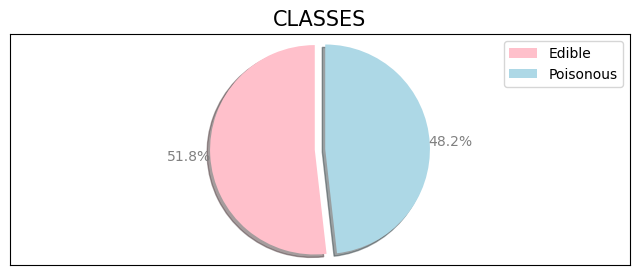

Pourcentage des classes de champignons


In [46]:
etiquettes = table['class'].value_counts().index
tailles = table['class'].value_counts().values

plt.figure(figsize=(8,3))
plt.pie(x=tailles,autopct='%1.1f%%',explode=(0.1,0),shadow=True, textprops={'color':"gray"}, 
startangle=90,colors=["pink","lightblue"],frame=True,pctdistance=1.2,labeldistance=0)
plt.axis('equal')
plt.legend(etiquettes)
plt.title("Classes".upper(),fontsize=15)
plt.xticks([])
plt.yticks([])
plt.show()
print('Pourcentage des classes de champignons')

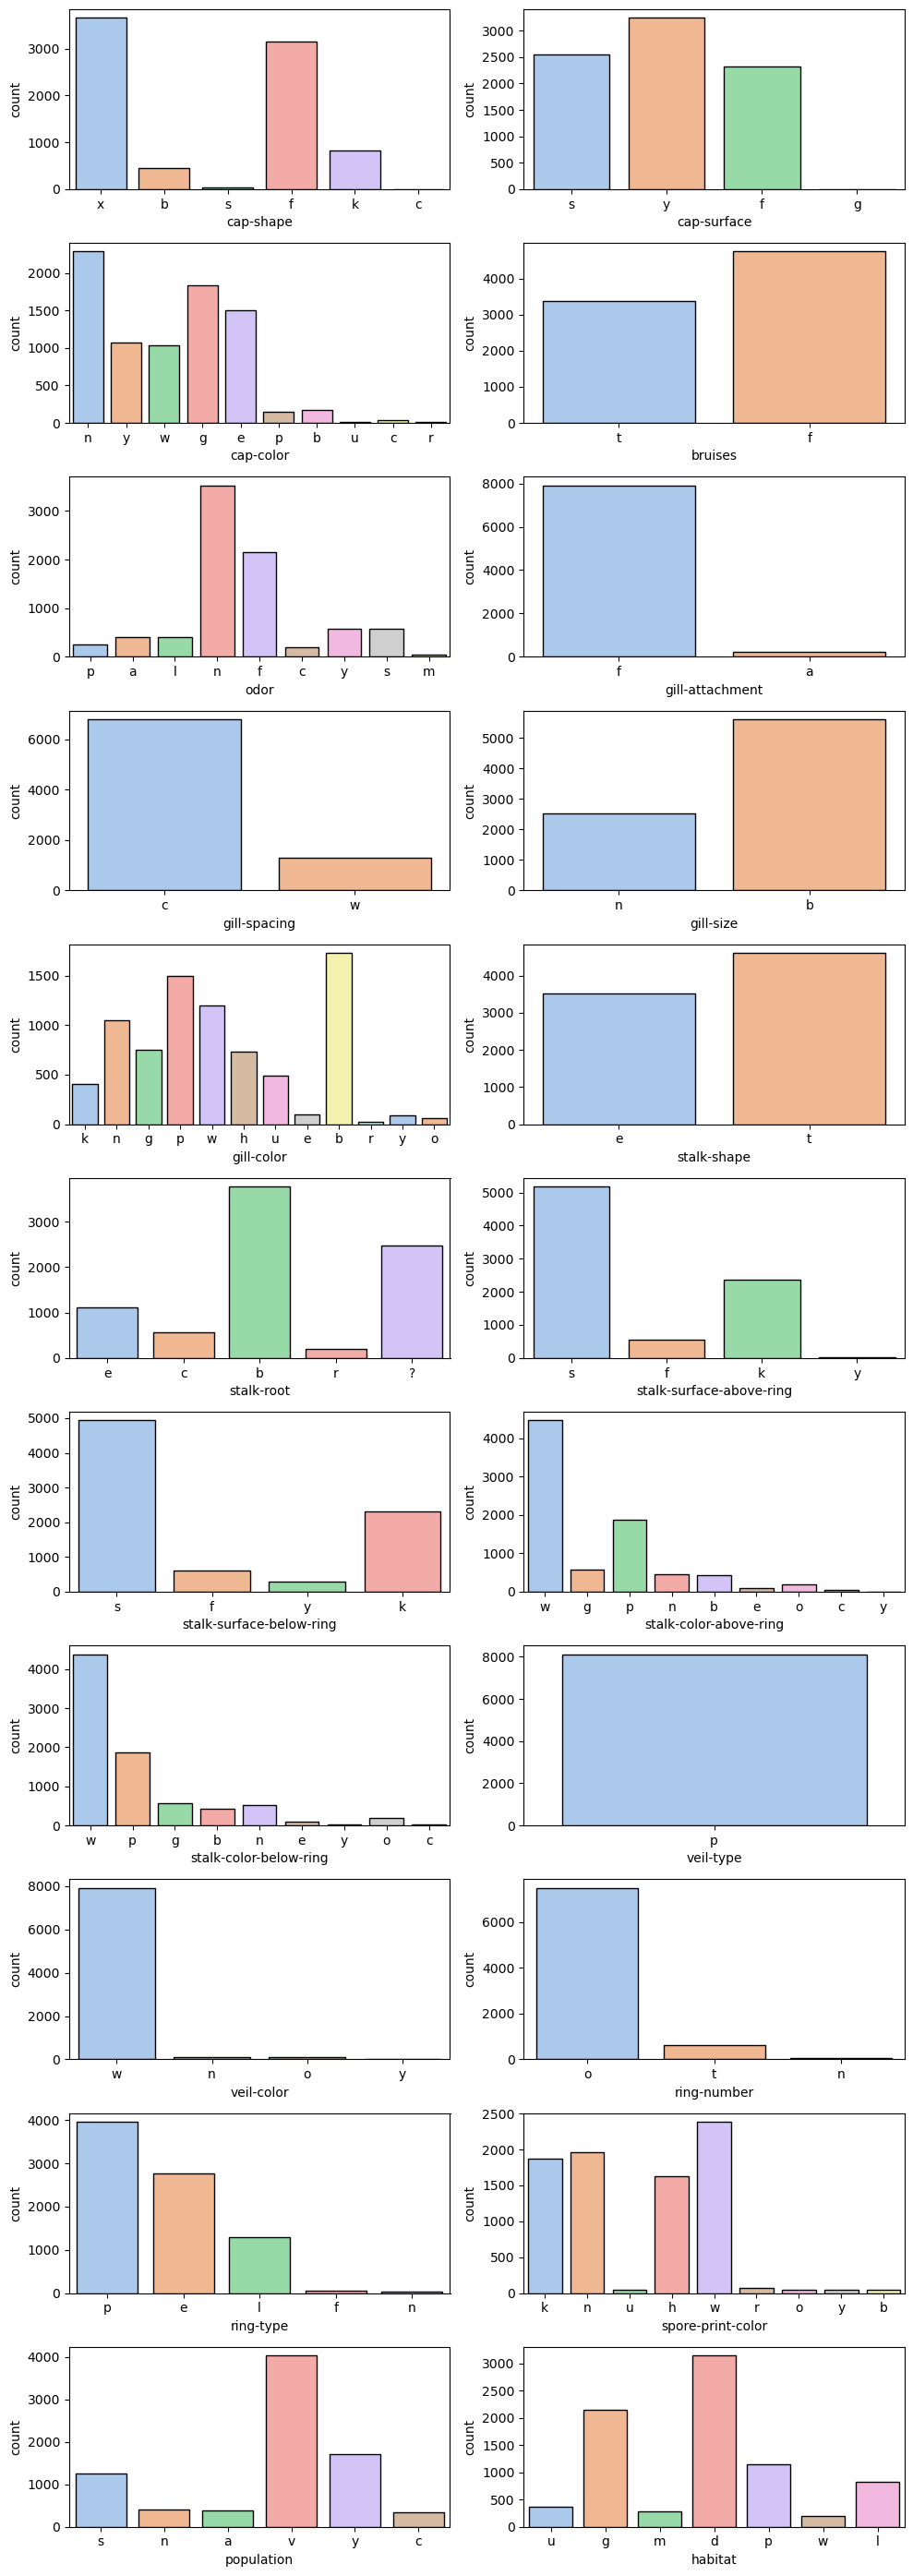

Cartes de comptoir pour les attributs


In [48]:
plt.figure(figsize=(10,28))
for i,j in zip(table.iloc[:,1:].columns,range(1,23)):
    plt.subplot(11,2,j)
    sns.countplot(x=i, data=table, palette="pastel", edgecolor="black")
plt.tight_layout()
plt.show()

print('Cartes de comptoir pour les attributs')

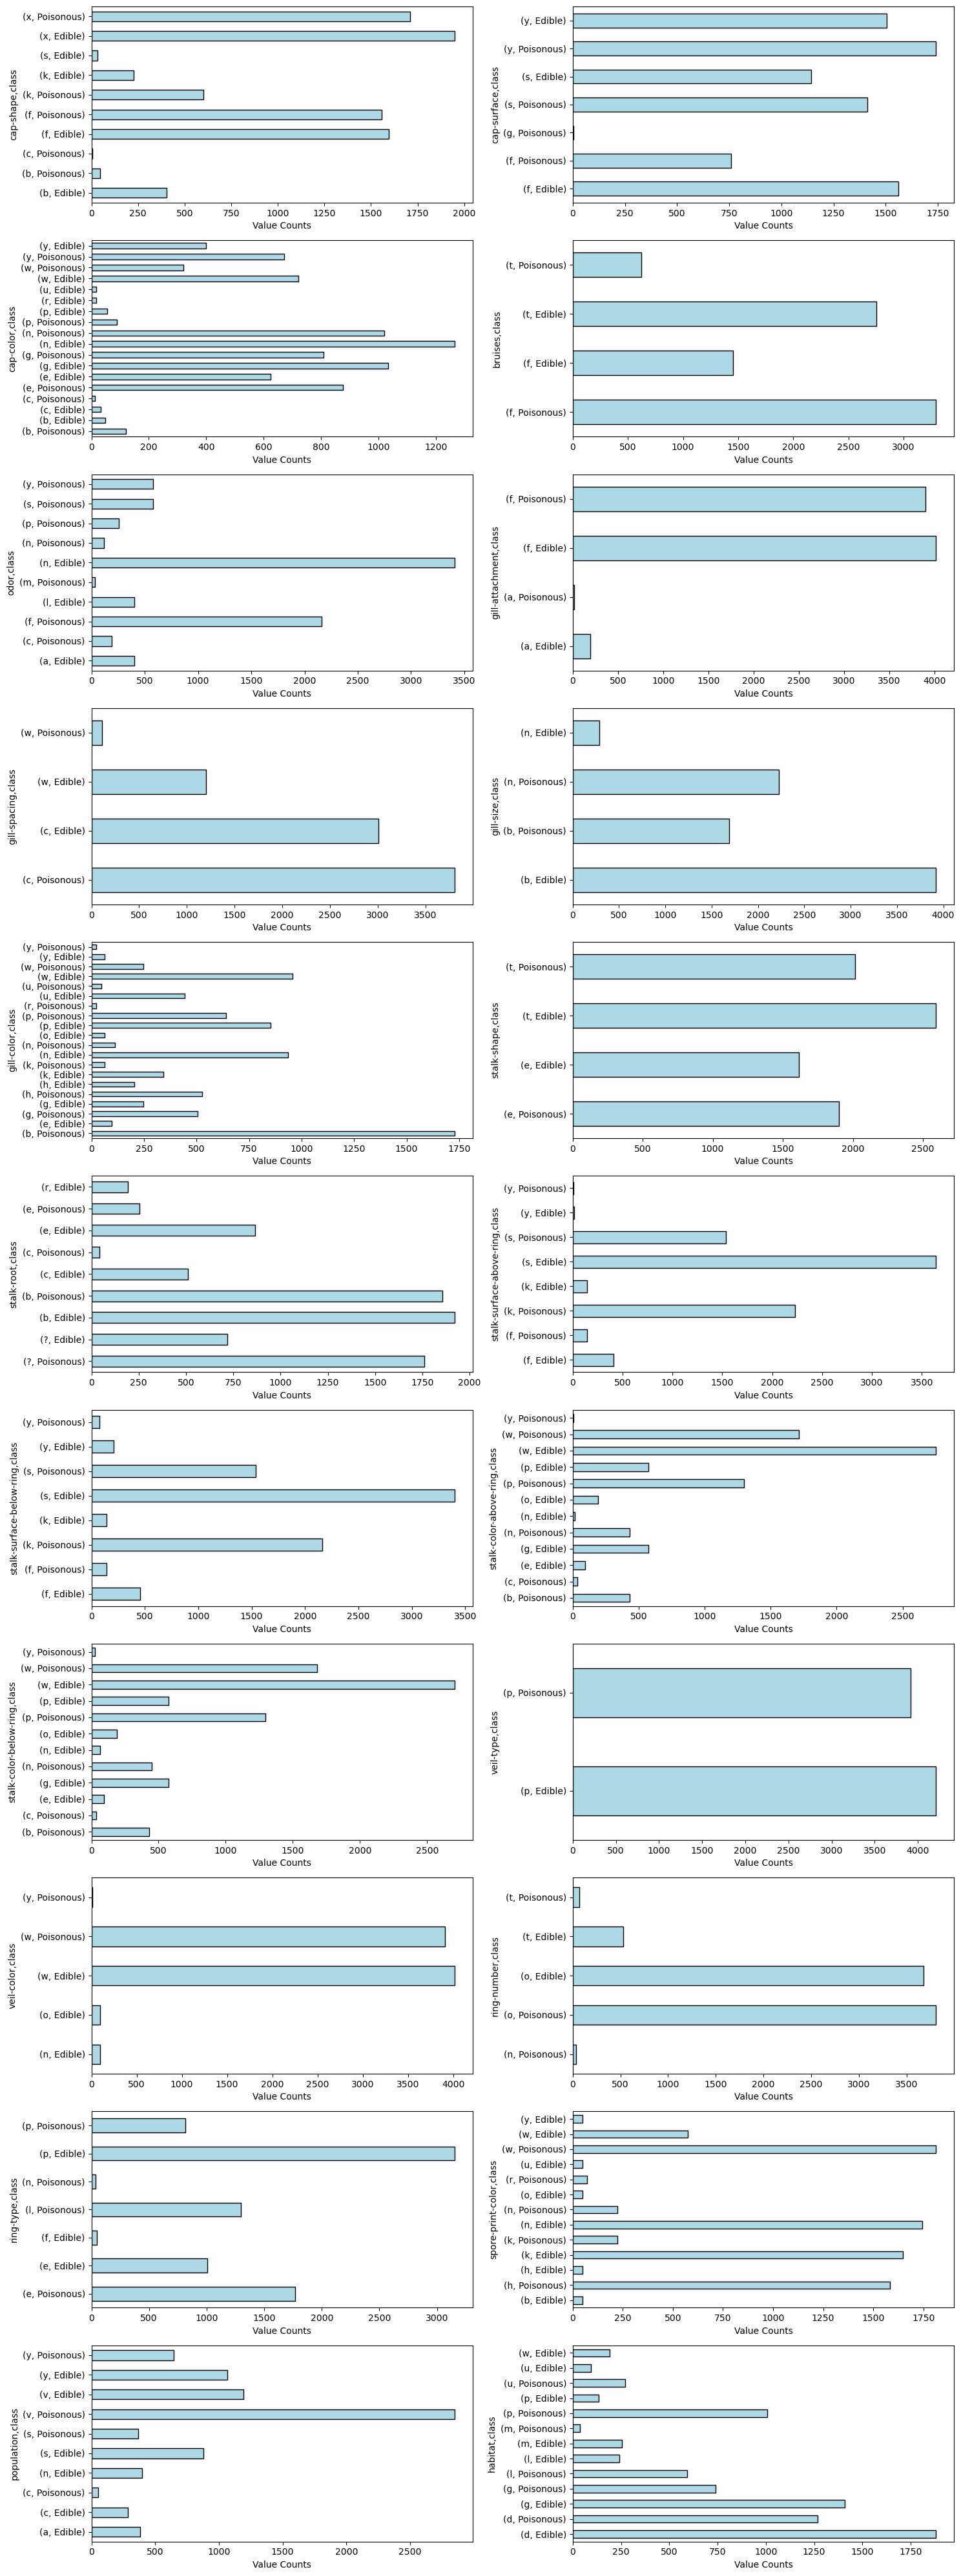

Query Cards for Attributes


In [50]:
plt.figure(figsize=(15,40))
for i,j in zip(table.iloc[:,1:].columns,range(1,23)):
    plt.subplot(11,2,j)
    table.groupby(i)['class'].value_counts().plot(kind="barh",edgecolor="black",color="lightblue")
    plt.xlabel("Value Counts")
plt.tight_layout()
plt.show()
print('Query Cards for Attributes')